<a href="https://colab.research.google.com/github/Makstarr/CURE-algorithm/blob/main/CURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Немного о данных

Всемирный доклад о счастье (англ. World Happiness Report)

Ежегодный доклад, публикуемый подразделением ООН по поиску решений стабильного развития.
В июле 2011 года Генеральная Ассамблея ООН приняла резолюцию, призывающую страны — члены ООН, оценивать счастье своего народа и использовать его как ориентир в политике государства. Вслед за этим, 2 апреля 2012 года, последовало первое заседание высокого уровня ООН «Счастье и благополучие: определение новой экономической парадигмы» под председательством премьер-министра Джигме Тинлей из Бутана, первой и пока единственной в мире страны, которая официально приняла валовое национальное счастье вместо валового внутреннего продукта в качестве основного показателя развития.
Рейтинг стран

Для оценки национального счастья используются 6 факторов: ВВП на душу населения, социальная поддержка, ожидаемая продолжительность жизни, свобода граждан самостоятельно принимать жизненно важные решения, щедрость и отношение к коррупции. Каждый фактор оценивается по 10-балльной шкале. Каждая страна также сравнивается с гипотетической страной под названием «Антиутопия». Антиутопия представляет самые низкие национальные средние значения для каждой ключевой переменной и вместе с остаточной ошибкой используется в качестве эталона регрессии.


*   https://www.kaggle.com/unsdsn/world-happiness
*   https://ru.wikipedia.org/wiki/Всемирный_доклад_о_счастье
*   https://www.kaggle.com/londeen/world-happiness-report-2020






# Постановка задачи

Некая фирма планирует расширять свой бизнес на международном уровне. У фирмы есть несколько форматов бизнеса и требуется определеить в каких странах существует целевая аудитория под различные форматы. Аналитики определили высокую корреляцию между уровнем счастья населения и успешностью бизнеса.

Требуется разделить страны на дв различных кластеровапо рангу общего счастья и каждого из основных факторов счастья из Мирового доклада о счастье. Проанализировать, какие страны существенно изменились по показателям счастья после пандемии коронавируса в 2020 году.

# Алгоритм CURE



Для решения задачи был выбран алгоритм CURE (англ. Clustering Using Representatives, кластеризация с использованием представителей) является эффективным алгоритмом кластерного анализа для больших баз данных. По сравнению с методом k-средних алгоритм более устойчив к выбросам и способен выявить кластеры, не имеющие сферической формы и с большим разбросом размеров. 
Так как среди факторов нет ярко выраженного разделения (все факторы - рэйтинги по 10 больной шкале) возможность искать кластеры сложной формы - преимущество алгоритма для данной задачи.



In [ ]:
import pandas as pd
from google.colab import drive


import itertools 
import numpy as np
from sklearn.preprocessing import normalize
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [ ]:
lenght_data = 1

Алгоритм нельзя применять сразу к большой базе данных, ввиду большой сложности вычислений. Для того, чтобы применять алгоритм используют небольшую случайную выборку точек, для которой осуществляется разделение на n заданных кластеров. 
Затем в алгоритм вводится весь датасет и распределяется по полученным на первом этапе кластреам, что важно, за один проход.

### Первый шаг алгоритма
Для кластеризации выборки используется иерархическая кластеризация, которую можно описать следующим образом. 


---

```
 
*Провести кластеризацию для создания начальных кластеров *

  1) Присвоение точкам индексов и создание кластеров для каждой из точек

  2) Определение ближайших кластеров
      Для всех кластеров
        Берем найденную на предыдущем запуске цикла дистанцию (или очень большое число при первом запуске)
        Находим новую минимальную дистанцию
        Присваиваем найденный ближайший кластер тому, для которого вызвана функция

  3) Пока число кластеров больше заданного при запуске алгоритма
        3.1) Найти индекс кластера, который можно обьединить с соседом
                Для всех кластеров
                   Берем найденную на предыдущем запуске цикла дистанцию (или очень большое число при первом запуске)
                   Находим новую минимальную дистанцию

        3.2) Создаем новый кластер из двух соседей
        3.3) Пересчет связей в списке кластеров
              Для всех кластеров
                Дистанция до нового кластера
                Если найденная дистанция меньше самой близкой
                  Обьявляем кластер ближайшим соседом нового
                Если ближайший кластер текущего был одним из обьединенных
                  Если этот кластер ближе чем новая минималная дистанция
                    Присваиваем ему новый ближайший
                  Есои нет
                    То самый ближайший к нему новый, обьединенный
                Если не был
                  Если его ближайший сосед дальше чем новый кластер
                    То самый ближайший к нему новый, обьединенный
        3.4) Добавляем новый кластер в список

На выходе получаем n кластеров


```
---






Для каждого кластера необходимо найти точки-предтавители. Их число - параметр принимаемы на вход алгоритмом (rep_count). Для расчета точек представителей необходимо взять rep_count точек внутри каждого кластера на максимальном удалении друг от друга. Это необходимо для максимальной интерпретации начальной формы кластера. Первая точка выбирается случайно, остальные по расстоянию от нее.
Затем точки необходимо сдвинуть на заданнвый (alpha) процент расстояния в сторону центроиа кластера. Получаемые таким образом синтетические точки и будут представлять форму кластера в дальнейшем.

### Второй шаг алгоритма

Берется весь датасет, и сканируется каждая его точка. Каждая точка присваевается к самому ближайшему кластеру ( на основании расчета расстояния до всех его точек представителей )
```
Финальная кластеризация

  1) Словарь для n кластеров
  2) Для всех точек в массиве
        Подбираем к какому классу пренадлежит точка
          Для всех кластеров
            Минимальная дистанция = большое число
            Минимальное растояние от точки до кластера
            Если дистанция меньше чем минимальная
               Минимальная дистанция =  новая минимальная дистанция 
            Возвращаем индекс кластера для которого дистанция минимальна
        Присваиваем в словарь, в массив одного из классов 
  3) Возвращаем массивы индексов точек распределенные по классам
      

На выходе получаем кластеризованный набор данных.


```



Вот так просто можно описать работу алгоритма CURE.

Далее представлены методы кластеризации разделенные на методы кластера и методы иерархической кластеризации. Для всех действий в коде добавлены комментарии.

In [ ]:
class Cluster(object):
    COUNTER = 0
    # Создание кластера на основе точек, их индексов и входных параметров
    def __init__(self, points, p_ids, rep_count, alpha):
        # Счетчик числа кластеров
        Cluster.COUNTER += 1
        self.id = Cluster.COUNTER
        # Добавление точе в формате массива
        self.points = np.array(points) if type(points) == type([]) else points
        # Число точек и число измерений
        self.n_points, self.dimensions = self.points.shape
        # Индексы точек
        self.p_ids = p_ids
        # Среднее значение по кластеру 
        self.mean = None
        # Параметры алгоритма
        self.alpha = alpha
        self.rep_count = rep_count
        # Считает точки-представители
        self.reps = self.assignReps()
        # Переменная ближайшего кластера
        self.closest = None
        # Переменная дистанции до ближайшего кластера
        self.closestDist = sys.maxsize

    #  Расчет центроида
    def getMean(self):
        # Если он уже посчитан возвращает значение
        if self.mean is not None:
            return self.mean
        # Если нет считает как сумма координат точек/число точек
        self.mean = self.points.sum(axis=0)/(self.n_points*1.0)
        return self.mean

    # Считает точки-представители
    def assignReps(self):
        # Если точек в кластере меньше чем точек-представителей
        # То все они и есть представители
        if self.n_points <= self.rep_count:
            return self.points[:,:]
        # Пустой сет и пустой массив
        tmp_set = set()
        reps = []
        # Для всех точек представителей
        for i in range(self.rep_count):
            max_dist = 0
            # Для всех точек в кластере (ищем самые далекие точки)
            for j in range(self.n_points):
                # Если точек представителей 0
                if i == 0:
                    # Расстояние между точкой и центроидом
                    min_dist = Cluster.p_distance(self.points[j], self.getMean())
                # Если точек представителей > 0
                else:
                    # Поиск минимального расстояния между точкой и массивом точек-представителей
                    min_dist = self.getClosestDist(self.points[j], reps)
                # Если расстояние больше максимального, новое максимальное
                if min_dist >= max_dist:
                    # максимальное расстояние
                    max_dist = min_dist
                    # индекс найденной точки 
                    max_point = j
            # если этой точки нет в списке
            if max_point not in tmp_set:
                # добавить
                tmp_set.add(max_point)
                # если есть массив представителей
                if reps is not None:
                    # Находим точку по индексу
                    point = self.points[max_point]
                    # Добавляем представителя сдвинутого на Alpha в сторону центроида 
                    reps.append(point + self.alpha * (self.getMean() - point))

                # если нет массива представителей
                else:
                    # Добавляем представителя сдвинутого на Alpha в сторону центроида 
                    point = self.points[max_point]
                    reps = [point + self.alpha * (self.getMean() - point)]
        # Возвращаем точки представители
        reps = np.array(reps)
        return reps
            
    # Поиск минимального расстояния между точкой и массивом точек
    def getClosestDist(self, point, points):
        points = np.array(points)
        k=np.empty(points.shape[0])
        for j in range(points.shape[0]):
            k[j]+=sum(((points[j]-point)**2)**0.5)

        return min(k)

    
    def __str__(self):
        return "[ID:%d] PointCount=%d, ClosestDist=%0.2f with [ID:%d]"%(self.id, self.n_points, self.closestDist, self.closest.id if self.closest else -1)
    
    def __repr(self):
        return self.__str__()
    


    @classmethod
    # Создаем новый кластер из двух соседей 
    def merge(cls, cluster1, cluster2):
        # Проверка что оба кластера в одном измерении
        if cluster1.dimensions != cluster2.dimensions:
            raise ValueError('Ошибка! Измерения точек не совпадают!')
        # Обьединяем точки кластеров в общий массив с сохранением
        combined_points = np.concatenate((cluster1.points, cluster2.points))
        # Обьединяем индексы точек кластеров в общий массив (Они не np.array поэтому просто +)
        combined_p_ids = cluster1.p_ids + cluster2.p_ids
        # Создаем новенький кластер
        new_cluster = Cluster(combined_points, combined_p_ids, cluster1.rep_count, cluster1.alpha)
        # Присваиваем ему среднее значение по кластеру
        new_cluster.mean = (cluster1.getMean()*cluster1.n_points + cluster2.getMean()*cluster2.n_points)/(new_cluster.n_points*1.0)
        return new_cluster
    
    # Минимальное растояние от точки до кластера
    def pointToClusterDistance(self, point):
        min_dist = sys.maxsize
        # Для всех точек-представителей
        for rep_index in range(len(self.reps)):
            # Вычисляется расстояние между точкой и точкой представителем
            dist = Cluster.p_distance(self.reps[rep_index], point)
            # Поиск минимального
            min_dist = min(min_dist, dist)
        return min_dist
    
    @staticmethod
    # Вычисляется расстояние между точкой и точкой представителем
    def p_distance(point1, point2):
        i=0
        for j in range(len(point1)):
          i+=((point1[j]-point2[j])**2)**0.5
        return ((1-(6*i**2)/lenght_data*(lenght_data**2-1))**2)**0.5

    @staticmethod
    # Расчет дистанции между текущим кластером и другим кластером
    def c_distance(cluster1, cluster2):
        min_dist = sys.maxsize
        # Для всех точек-представителей одного
        for rep_1_index in range(len(cluster1.reps)):
            # Для всех точек-представителей другого
            for rep_2_index in range(len(cluster2.reps)):
                #  Вычисляется расстояние между точками представителями
                dist = Cluster.p_distance(cluster1.reps[rep_1_index], cluster2.reps[rep_2_index])
                #  Берется минимальная
                min_dist = min(min_dist, dist)
        return min_dist

In [ ]:
# Иерархическая кластеризация
class HeirarchicalClustering(object):
    # Создание обьекта метода, на основе входных параметров
    def __init__(self, cluster_count, rep_count, alpha):
        self.cluster_count = cluster_count
        self.clusters = []
        self.rep_count = rep_count
        self.alpha = alpha
    #
    #
    #
    # №1 ПЕРВНОНАЧАЛЬНАЯ КЛАСТЕРИЗАЦИЯ НА ОСНОВЕ МАЛЕНЬКОЙ ВЫБОРКИ
    #
    #
    #
    def fit(self, points):
        # Присвоение точкам индексов и создание кластеров для каждой из точек
        for p_index, point in enumerate(points):
            self.clusters.append(Cluster([point], [p_index], self.rep_count, self.alpha))
        
        # Определение ближайших кластеров
        for index in range(len(self.clusters)):
            self.assignClosestCluster(self.clusters[index])
          
        # Пока число кластеров больше заданного при запуске алгоритма
        while len(self.clusters) > self.cluster_count:

            # Найти индекс кластера, который можно обьединить с соседом
            u_index = self.getMergeCandidate()
            # Убрать кластер из массива кластеров и привоить переменной 
            # и привоить переменной u-кластер
            u_cluster = self.clusters.pop(u_index)
            # v-кластер равен соседу убранного
            v_cluster = u_cluster.closest
            # Найти ближайший и убрать его из массива
            self.removeCluster(v_cluster)
            # Создаем новый кластер из двух соседей (метод класса Cluster)
            new_cluster = Cluster.merge(u_cluster, v_cluster)
            # Пересчет связей в списке кластеров
            self.rebuildClosestClusterLinks(new_cluster, u_cluster.id, v_cluster.id)
            # Добавляем новый кластер в список
            self.clusters.append(new_cluster)

    # Определение ближайших кластеров
    def assignClosestCluster(self, cluster):
        # задание минимальной дистанции в ввиде очень большого int
        min_dist = sys.maxsize
        # переменная для ближайшего кластера
        closest = None
        # Для всех кластеров
        for i in range(len(self.clusters)):
            # Если индекс кластера тот же самый что и у текущего (уже обьедденины) ничего не делай
            if cluster.id == self.clusters[i].id: continue
            # Расчет дистанции между текущим кластером и кластером для которого вызвана функция (метод кластера)
            dist = Cluster.c_distance(cluster, self.clusters[i])
            # Если дистанция меньше минимальной (изначально огромного числа), значит это новая минимальная дистанция     
            if dist < min_dist:
                min_dist = dist
                # Значит текущий кластер самый близкий к тому, для которого вызвана функция
                closest = self.clusters[i]
        # Присваиваем найденный ближайший кластер тому, для которого вызвана функция
        cluster.closest = closest
        # Присваиваем дистанцию между ними
        cluster.closestDist = min_dist

    # Найти подходящие для обьединения кластеры
    def getMergeCandidate(self):
        # задание минимальной дистанции в ввиде очень большого int
        min_dist = sys.maxsize
        # Индекс подходящего для обьединения кластера
        cluster_index = 0
        # Для всех кластеров
        for i in range(len(self.clusters)):
            # Берем найденную на предыдущем шаге дистанцию до ближайшего кластера
            dist = self.clusters[i].closestDist
            # Ели дистанция меньше минимальной (изначально большое число)
            if dist < min_dist:
              # Новая минимальная дистанция между кластерами
              min_dist = dist
              cluster_index = i
        # Возвращаем айди кластера, который может быть объединен с соседом
        return cluster_index

    # Найти и убрать кластер из массива
    def removeCluster(self, cluster):
        # Для всех кластеров
        for i in range(len(self.clusters)):
            # Находим кластер в списке
            if self.clusters[i].id == cluster.id:
                # Убираем кластер из списка
                self.clusters[i] = self.clusters[-1]
                self.clusters.pop()
                return
        return "Кластер не был найден в списке"

    # Пересчет связей в списке кластеров
    def rebuildClosestClusterLinks(self, new_cluster, u_cluster_id, v_cluster_id):
        min_dist = sys.maxsize
        # Для всех кластеров
        for i in range(len(self.clusters)):
            # Дистанция между новым и текущим
            new_dist = Cluster.c_distance(new_cluster, self.clusters[i])
            # Если найденная дистанция меньше самой близкой
            # Обьявляем кластер ближайшим соседом нового
            if new_cluster.closestDist > new_dist:
                new_cluster.closestDist = new_dist
                new_cluster.closest = self.clusters[i]
            # Если ближайший кластер текущего был одним из обьединенных
            if self.clusters[i].closest.id in (u_cluster_id, v_cluster_id):
                # Если этот кластер ближе чем новая минималная дистанция
                # Присваиваем ему новый ближайший
                if self.clusters[i].closestDist < new_dist:
                    self.assignClosestCluster(self.clusters[i])
                # Есои нет
                # То самый ближайший к нему новый, обьединенный
                else:
                    self.clusters[i].closestDist = new_dist
                    self.clusters[i].closest = new_cluster
            # Если не был
            else:
              # Если его ближайший сосед дальше чем новый кластер
              # То самый ближайший к нему новый, обьединенный
                if self.clusters[i].closestDist > new_dist:
                    self.clusters[i].closestDist = new_dist
                    self.clusters[i].closest = new_cluster
    #
    #
    #
    # №2 КЛАСТЕРИЗАЦИЯ НА ОСНОВЕ ВСЕЙ ВЫБОРКИ
    #
    #
    #
    def predict(self, points):
        points = np.array(points)
        # Новый словарь, с пустым массивом, для каждого кластера 
        predictions = {cluster.id:[] for cluster in self.clusters}
        # Для всех точек в массиве
        for i in range(len(points)):
            # Подбираем к какому классу пренадлежит точка 
            label = self.predict_point(points[i])
            # Присваиваем в словарь, в массив одного из классов
            predictions[label].append(i)
        # Возвращаем массивы индексов точек распределенные по классам
        return predictions.values()

    #  Подбираем к какому классу пренадлежит точка 
    def predict_point(self, point):
        point = np.array(point)
        min_dist = sys.maxsize
        label = None
        # Для всех кластеров
        for i in range(len(self.clusters)):
            # Минимальное растояние от точки до кластера (Метод кластера)
            dist = self.clusters[i].pointToClusterDistance(point)
            # Если дистанция меньше чем минимальная, тогда относим к соответсвующему кластеру
            if dist < min_dist:
                min_dist = dist
                label = self.clusters[i].id
        # Возвращаем индекс кластера
        return label

In [ ]:
def readDataset(data_file, columns, country):
  # создаем датафрэйм пандас с выбранными столбцами
  countries = pd.read_csv(data_file, usecols = country)
  data_frame = pd.read_csv(data_file, usecols = columns)
  data_frame.head(2)
  # создаем np массив с выбранными столбцами
  data_array = data_frame.to_numpy()
  data_frame = pd.DataFrame(data=data_array, columns=["Общая оценка","ВВП на душу населения","Социальная поддержка","Продолжительность жизни","Свобода","Щедрость","Оценка коррупции"])
  return data_frame, data_array, countries

# Расчет для 2019

Выбор признаков обусловлен различаями в данных для 2019 и 2020 года. Выбраны все основные признаки, описаннные в [статье о Мировом докладе о счастье](https://ru.wikipedia.org/wiki/Всемирный_доклад_о_счастье), которые есть в обоих датасетах.
Расчет для обоих массивов данных одинаков, поэтому опишу я только для 2019 года.


In [ ]:
data_file = '2019.csv'
data = readDataset(data_file, [2,3,4,5,6,7,8], [1])[1]

data_set_full=readDataset(data_file, [2,3,4,5,6,7,8], [1])[0]
lenght_data = len(data_set_full)
countries=readDataset(data_file, [2,3,4,5,6,7,8], [1])[2]

array_data=data.T
order_data = array_data.argsort()
ranks_data = order_data.argsort().T

## Весь датасет с выбранными признаками


In [ ]:
data_set_full

,Общая оценка,ВВП на душу населения,Социальная поддержка,Продолжительность жизни,Свобода,Щедрость,Оценка коррупции
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Матрица Обьект-Признак

In [ ]:
obj_pr=pd.DataFrame(data=data, index=["Объект_"+str(i) for i in range(data.shape[0])], columns=["Признак_"+str(i) for i in range(data.shape[1])])
obj_pr

,Признак_0,Признак_1,Признак_2,Признак_3,Признак_4,Признак_5,Признак_6
Объект_0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Объект_1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Объект_2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Объект_3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Объект_4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
Объект_151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Объект_152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Объект_153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
Объект_154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


## Матрица рангов

В качестве меры расстояния выбран коэффициент ранговой корреляции Спирмена.
Для его расчета необходимо заменить столбцы дданных на рэйтинги.


In [ ]:
rang = pd.DataFrame(data=ranks_data, index=["Объект_"+str(i) for i in range(ranks_data.shape[0])], columns=["Объект_"+str(i) for i in range(ranks_data.shape[1])])
rang

,Объект_0,Объект_1,Объект_2,Объект_3,Объект_4,Объект_5,Объект_6
Объект_0,155,133,154,128,151,61,152
Объект_1,154,142,152,130,150,117,153
Объект_2,153,149,153,142,153,134,148
Объект_3,152,141,155,141,149,148,107
Объект_4,151,144,141,132,139,142,144
...,...,...,...,...,...,...,...
Объект_151,4,21,11,48,134,100,154
Объект_152,3,28,24,33,78,136,120
Объект_153,2,20,4,12,0,66,12
Объект_154,1,1,0,1,22,108,27


## Матрица Обьект-Обьект

Затем по формуле
 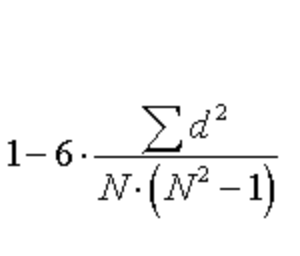
 Рассчитывается коэфициент ранговой корреляции. 

Здесь N-число обьектов, d - разница между двумя рангами по соответствующим признакам

In [ ]:
def p_distance(point1, point2):
  i=0
  for j in range(len(point1)):
    i+=((point1[j]-point2[j])**2)**0.5
    return ((1-(6*i**2)/155*(155**2-1))**2)**0.5
matrix = []
for i in range(ranks_data.shape[0]):
  new_stolbik=[]
  for j in range(ranks_data.shape[0]):
    new_stolbik.append( p_distance(ranks_data[i], ranks_data[j]))
  matrix.append(new_stolbik)
obj_obj = pd.DataFrame(data=matrix, index=["Объект_"+str(i) for i in range(len(ranks_data))], columns=["Объект_"+str(i) for i in range(len(ranks_data))])
obj_obj.to_csv('/drive/My Drive/obj_obj-2019.csv')
obj_obj

,Объект_0,Объект_1,Объект_2,Объект_3,Объект_4,Объект_5,Объект_6,Объект_7,Объект_8,Объект_9,Объект_10,Объект_11,Объект_12,Объект_13,Объект_14,Объект_15,Объект_16,Объект_17,Объект_18,Объект_19,Объект_20,Объект_21,Объект_22,Объект_23,Объект_24,Объект_25,Объект_26,Объект_27,Объект_28,Объект_29,Объект_30,Объект_31,Объект_32,Объект_33,Объект_34,Объект_35,Объект_36,Объект_37,Объект_38,Объект_39,...,Объект_116,Объект_117,Объект_118,Объект_119,Объект_120,Объект_121,Объект_122,Объект_123,Объект_124,Объект_125,Объект_126,Объект_127,Объект_128,Объект_129,Объект_130,Объект_131,Объект_132,Объект_133,Объект_134,Объект_135,Объект_136,Объект_137,Объект_138,Объект_139,Объект_140,Объект_141,Объект_142,Объект_143,Объект_144,Объект_145,Объект_146,Объект_147,Объект_148,Объект_149,Объект_150,Объект_151,Объект_152,Объект_153,Объект_154,Объект_155
Объект_0,1.000000e+00,9.289613e+02,3.718845e+03,8.368652e+03,1.487838e+04,2.324803e+04,3.347761e+04,4.556710e+04,5.951652e+04,7.532586e+04,9.299513e+04,1.125243e+05,1.339134e+05,1.571625e+05,1.822714e+05,2.092403e+05,2.380691e+05,2.687578e+05,3.013065e+05,3.357150e+05,3.719835e+05,4.101119e+05,4.501003e+05,4.919485e+05,5.356567e+05,5.812248e+05,6.286528e+05,6.779408e+05,7.290887e+05,7.820964e+05,8.369642e+05,8.936918e+05,9.522794e+05,1.012727e+06,1.075034e+06,1.139202e+06,1.205229e+06,1.273116e+06,1.342863e+06,1.414470e+06,...,1.251356e+07,1.273024e+07,1.294878e+07,1.316918e+07,1.339144e+07,1.361556e+07,1.384154e+07,1.406938e+07,1.429908e+07,1.453064e+07,1.476406e+07,1.499934e+07,1.523648e+07,1.547548e+07,1.571634e+07,1.595906e+07,1.620364e+07,1.645008e+07,1.669838e+07,1.694854e+07,1.720056e+07,1.745444e+07,1.771018e+07,1.796778e+07,1.822724e+07,1.848856e+07,1.875174e+07,1.901678e+07,1.928368e+07,1.955244e+07,1.982305e+07,2.009553e+07,2.036987e+07,2.064607e+07,2.092413e+07,2.120405e+07,2.148582e+07,2.176946e+07,2.205496e+07,2.234232e+07
Объект_1,9.289613e+02,1.000000e+00,9.289613e+02,3.718845e+03,8.368652e+03,1.487838e+04,2.324803e+04,3.347761e+04,4.556710e+04,5.951652e+04,7.532586e+04,9.299513e+04,1.125243e+05,1.339134e+05,1.571625e+05,1.822714e+05,2.092403e+05,2.380691e+05,2.687578e+05,3.013065e+05,3.357150e+05,3.719835e+05,4.101119e+05,4.501003e+05,4.919485e+05,5.356567e+05,5.812248e+05,6.286528e+05,6.779408e+05,7.290887e+05,7.820964e+05,8.369642e+05,8.936918e+05,9.522794e+05,1.012727e+06,1.075034e+06,1.139202e+06,1.205229e+06,1.273116e+06,1.342863e+06,...,1.229874e+07,1.251356e+07,1.273024e+07,1.294878e+07,1.316918e+07,1.339144e+07,1.361556e+07,1.384154e+07,1.406938e+07,1.429908e+07,1.453064e+07,1.476406e+07,1.499934e+07,1.523648e+07,1.547548e+07,1.571634e+07,1.595906e+07,1.620364e+07,1.645008e+07,1.669838e+07,1.694854e+07,1.720056e+07,1.745444e+07,1.771018e+07,1.796778e+07,1.822724e+07,1.848856e+07,1.875174e+07,1.901678e+07,1.928368e+07,1.955244e+07,1.982305e+07,2.009553e+07,2.036987e+07,2.064607e+07,2.092413e+07,2.120405e+07,2.148582e+07,2.176946e+07,2.205496e+07
Объект_2,3.718845e+03,9.289613e+02,1.000000e+00,9.289613e+02,3.718845e+03,8.368652e+03,1.487838e+04,2.324803e+04,3.347761e+04,4.556710e+04,5.951652e+04,7.532586e+04,9.299513e+04,1.125243e+05,1.339134e+05,1.571625e+05,1.822714e+05,2.092403e+05,2.380691e+05,2.687578e+05,3.013065e+05,3.357150e+05,3.719835e+05,4.101119e+05,4.501003e+05,4.919485e+05,5.356567e+05,5.812248e+05,6.286528e+05,6.779408e+05,7.290887e+05,7.820964e+05,8.369642e+05,8.936918e+05,9.522794e+05,1.012727e+06,1.075034e+06,1.139202e+06,1.205229e+06,1.273116e+06,...,1.208578e+07,1.229874e+07,1.251356e+07,1.273024e+07,1.294878e+07,1.316918e+07,1.339144e+07,1.361556e+07,1.384154e+07,1.406938e+07,1.429908e+07,1.453064e+07,1.476406e+07,1.499934e+07,1.523648e+07,1.547548e+07,1.571634e+07,1.595906e+07,1.620364e+07,1.645008e+07,1.669838e+07,1.694854e+07,1.720056e+07,1.745444e+07,1.771018e+07,1.796778e+07,1.822724e+07,1.848856e+07,1.875174e+07,1.901678e+07,1.928368e+07,1.955244e+07,1.982305e+07,2.009553e+07,2.036987e+07,2.064607e+07,2.092413e+07,2.120405e+07,2.148582e+07,2.176946e+07
Объект

## Подбор параметров

Проверим правильность выбора 2х кластеров, рассчитав оценку силуэта.

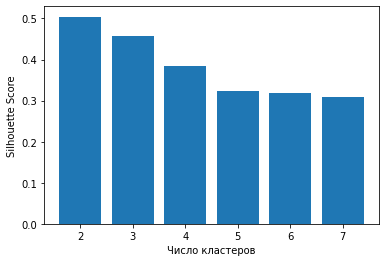

In [ ]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data))) 

k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Число кластеров', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

Оценка подтверждает оптимальность выбора двух кластеров для данной задачи.

In [ ]:
cluster_count = 2

Комбинация числа точек представителей и коэфициента сжатия определяется подбором. (Т.к. данных о классах нет даже для небольшой выборки)
В качестве критерия правильности распределения взят общий рэйтинг счастья.

In [ ]:
rep_count = 19
alpha = 0.2

## Расчет

In [ ]:
hc = HeirarchicalClustering(cluster_count, rep_count, alpha)
hc.fit(data)
predictions = hc.predict(data)

### Размеры кластеров

Если посмотреть на общий рэйтинг счасьтья, можно заметить, что до 5 очков получили в 2019 году 98 стран из 156. 
Таким образом при подборе параметров можно смотреть на соответствие размеров кластеров этому чилу.
Далее результаты наносятся на карту и сверяется непосредственно качество разделения. 
При rep_count = 19 и alpha = 0.2 алгоритм показывает наиболее адекватные результаты (стоит заметить, что похожие числа чаще всего встречаются и в других работах).

In [ ]:
len(list(predictions)[1])

63

In [ ]:
len(list(predictions)[0])

93

### Маркировка кластеров 


In [ ]:
# Масисив числовой
colors_index = []
for i in range(len(data)):
  if (i in list(predictions)[1]):
    colors_index.append(1)
  elif (i in list(predictions)[0]):
    colors_index.append(0)
# Масисив цветов
colors = []
for i in colors_index:
  if (i==1):
      colors.append("#e98155")
  elif (i==0):
      colors.append("#9ee771")
  elif (i==2):
    colors.append("#f00")
  else:
    colors.append("#000")

## Визуализация

In [ ]:
mydata = [dict(type='choropleth',
             locations = 
countries['Country'],
             locationmode = 'country names',
             z = colors_index,
             text = countries['Country'],
             colorscale = [(0,"#9ee771"), (1,"#e98155")],
             colorbar = {'title':'Кластеры'})]
layout = dict(title='Групировка стран по кластерам',
              geo=dict(showframe = False, projection = {'type':'mollweide'})) #type = ['equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal']
map4 = dict(data=mydata, layout=layout)
iplot(map4)

Как и можно было предположить, более развитые страны афкики, большинство европейских стран, Росия и большая часть стран азии, США и южная америка попали в один кластер "Счастливых стран".
В другой кластер попали страны африки, страны на ближнем востоке, Украина. 
Эти страны еще недавно были затронуты войной или являются тяжелыми для жизни (как например страны африки).


Далее производится расчет для 2020 года.

# Расчет для 2020

In [ ]:

data_file = '2020.csv'

data = readDataset(data_file, [2, 6, 7 ,8 ,9 ,10, 11], [0])[1]

data_set_full=readDataset(data_file, [2, 6, 7 ,8 ,9 ,10, 11], [0])[0]
lenght_data = len(data_set_full)
countries=readDataset(data_file, [2, 6, 7 ,8 ,9 ,10, 11], [0])[2]

array_data=data.T
order_data = array_data.argsort()
ranks_data = order_data.argsort().T

In [ ]:
def calculateMetrics(pred_clusters, true_labels_arr):
    true_labels = {}
    for index, true_label in enumerate(true_labels_arr):
        if true_label in true_labels:
            true_labels[true_label].append(index)
        else:
            true_labels[true_label] = [index]
    true_labels = true_labels.values()
    true_label_pairs = []
    for true_cluster in true_labels:
        true_cluster.sort()
        true_label_pairs += itertools.combinations(true_cluster, 2)
    
    pred_label_pairs = []
    for index, pred_cluster in enumerate(pred_clusters):
        pred_cluster.sort()
        #print( 'Кластер %d: %s\n'%(index+1, str(pred_cluster)))
        pred_label_pairs += itertools.combinations(pred_cluster, 2)
    true_label_pairs = set(true_label_pairs)
    pred_label_pairs = set(pred_label_pairs)
    
    precision = len(pred_label_pairs.intersection(true_label_pairs))/(1.0*len(pred_label_pairs))
    recall = len(pred_label_pairs.intersection(true_label_pairs))/(1.0*len(true_label_pairs))
    f1 = 2*precision*recall/(precision+recall)
    return [("Precision: %0.2f, Recall: %0.2f"%(precision, recall)),  ("F1 score: %0.2f"%(f1))]
def gridSearch(rank_data, rank_sample):    
  rep_counts = list(range(18, 22))    
  alphas = np.arange(0.1, 0.4, 0.1) 
  prints=[] 
  fits=[]
  answers = []
  for rep_count in rep_counts:        
    for alpha in alphas:            
      hc = HeirarchicalClustering(cluster_count, rep_count, alpha)            
      hc.fit(rank_sample)            
      predictions = hc.predict(rank_data)            
      prints.append('RepCount: %d, Alpha: %f'%(rep_count, alpha))         
      fits.append(calculateMetrics(predictions, AgglomerativeClustering(n_clusters=2).fit_predict(rank_data)))
      answers.append([prints, fits])
  return answers

In [ ]:
data_set_full

,Общая оценка,ВВП на душу населения,Социальная поддержка,Продолжительность жизни,Свобода,Щедрость,Оценка коррупции
0,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...
148,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


In [ ]:
obj_pr=pd.DataFrame(data=data, index=["Объект_"+str(i) for i in range(data.shape[0])], columns=["Признак_"+str(i) for i in range(data.shape[1])])
obj_pr

,Признак_0,Признак_1,Признак_2,Признак_3,Признак_4,Признак_5,Признак_6
Объект_0,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
Объект_1,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
Объект_2,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
Объект_3,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
Объект_4,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...
Объект_148,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
Объект_149,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
Объект_150,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
Объект_151,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


In [ ]:
rang = pd.DataFrame(data=ranks_data, index=["Объект_"+str(i) for i in range(ranks_data.shape[0])], columns=["Объект_"+str(i) for i in range(ranks_data.shape[1])])
rang

,Объект_0,Объект_1,Объект_2,Объект_3,Объект_4,Объект_5,Объект_6
Объект_0,152,131,149,124,148,66,3
Объект_1,151,140,150,132,149,107,1
Объект_2,150,146,145,148,137,123,7
Объект_3,149,139,152,136,147,144,45
Объект_4,148,147,148,139,150,132,6
...,...,...,...,...,...,...,...
Объект_148,4,1,0,0,18,112,136
Объект_149,3,18,4,45,126,105,2
Объект_150,2,24,43,22,35,61,94
Объект_151,1,12,7,6,1,92,67


In [ ]:
matrix = []
for i in range(ranks_data.shape[0]):
  new_stolbik=[]
  for j in range(ranks_data.shape[0]):
    new_stolbik.append( p_distance(ranks_data[i], ranks_data[j]))
  matrix.append(new_stolbik)
obj_obj = pd.DataFrame(data=matrix, index=["Объект_"+str(i) for i in range(len(ranks_data))], columns=["Объект_"+str(i) for i in range(len(ranks_data))])
obj_obj

,Объект_0,Объект_1,Объект_2,Объект_3,Объект_4,Объект_5,Объект_6,Объект_7,Объект_8,Объект_9,Объект_10,Объект_11,Объект_12,Объект_13,Объект_14,Объект_15,Объект_16,Объект_17,Объект_18,Объект_19,Объект_20,Объект_21,Объект_22,Объект_23,Объект_24,Объект_25,Объект_26,Объект_27,Объект_28,Объект_29,Объект_30,Объект_31,Объект_32,Объект_33,Объект_34,Объект_35,Объект_36,Объект_37,Объект_38,Объект_39,...,Объект_113,Объект_114,Объект_115,Объект_116,Объект_117,Объект_118,Объект_119,Объект_120,Объект_121,Объект_122,Объект_123,Объект_124,Объект_125,Объект_126,Объект_127,Объект_128,Объект_129,Объект_130,Объект_131,Объект_132,Объект_133,Объект_134,Объект_135,Объект_136,Объект_137,Объект_138,Объект_139,Объект_140,Объект_141,Объект_142,Объект_143,Объект_144,Объект_145,Объект_146,Объект_147,Объект_148,Объект_149,Объект_150,Объект_151,Объект_152
Объект_0,1.000000e+00,9.289613e+02,3.718845e+03,8.368652e+03,1.487838e+04,2.324803e+04,3.347761e+04,4.556710e+04,5.951652e+04,7.532586e+04,9.299513e+04,1.125243e+05,1.339134e+05,1.571625e+05,1.822714e+05,2.092403e+05,2.380691e+05,2.687578e+05,3.013065e+05,3.357150e+05,3.719835e+05,4.101119e+05,4.501003e+05,4.919485e+05,5.356567e+05,5.812248e+05,6.286528e+05,6.779408e+05,7.290887e+05,7.820964e+05,8.369642e+05,8.936918e+05,9.522794e+05,1.012727e+06,1.075034e+06,1.139202e+06,1.205229e+06,1.273116e+06,1.342863e+06,1.414470e+06,...,1.187467e+07,1.208578e+07,1.229874e+07,1.251356e+07,1.273024e+07,1.294878e+07,1.316918e+07,1.339144e+07,1.361556e+07,1.384154e+07,1.406938e+07,1.429908e+07,1.453064e+07,1.476406e+07,1.499934e+07,1.523648e+07,1.547548e+07,1.571634e+07,1.595906e+07,1.620364e+07,1.645008e+07,1.669838e+07,1.694854e+07,1.720056e+07,1.745444e+07,1.771018e+07,1.796778e+07,1.822724e+07,1.848856e+07,1.875174e+07,1.901678e+07,1.928368e+07,1.955244e+07,1.982305e+07,2.009553e+07,2.036987e+07,2.064607e+07,2.092413e+07,2.120405e+07,2.148582e+07
Объект_1,9.289613e+02,1.000000e+00,9.289613e+02,3.718845e+03,8.368652e+03,1.487838e+04,2.324803e+04,3.347761e+04,4.556710e+04,5.951652e+04,7.532586e+04,9.299513e+04,1.125243e+05,1.339134e+05,1.571625e+05,1.822714e+05,2.092403e+05,2.380691e+05,2.687578e+05,3.013065e+05,3.357150e+05,3.719835e+05,4.101119e+05,4.501003e+05,4.919485e+05,5.356567e+05,5.812248e+05,6.286528e+05,6.779408e+05,7.290887e+05,7.820964e+05,8.369642e+05,8.936918e+05,9.522794e+05,1.012727e+06,1.075034e+06,1.139202e+06,1.205229e+06,1.273116e+06,1.342863e+06,...,1.166543e+07,1.187467e+07,1.208578e+07,1.229874e+07,1.251356e+07,1.273024e+07,1.294878e+07,1.316918e+07,1.339144e+07,1.361556e+07,1.384154e+07,1.406938e+07,1.429908e+07,1.453064e+07,1.476406e+07,1.499934e+07,1.523648e+07,1.547548e+07,1.571634e+07,1.595906e+07,1.620364e+07,1.645008e+07,1.669838e+07,1.694854e+07,1.720056e+07,1.745444e+07,1.771018e+07,1.796778e+07,1.822724e+07,1.848856e+07,1.875174e+07,1.901678e+07,1.928368e+07,1.955244e+07,1.982305e+07,2.009553e+07,2.036987e+07,2.064607e+07,2.092413e+07,2.120405e+07
Объект_2,3.718845e+03,9.289613e+02,1.000000e+00,9.289613e+02,3.718845e+03,8.368652e+03,1.487838e+04,2.324803e+04,3.347761e+04,4.556710e+04,5.951652e+04,7.532586e+04,9.299513e+04,1.125243e+05,1.339134e+05,1.571625e+05,1.822714e+05,2.092403e+05,2.380691e+05,2.687578e+05,3.013065e+05,3.357150e+05,3.719835e+05,4.101119e+05,4.501003e+05,4.919485e+05,5.356567e+05,5.812248e+05,6.286528e+05,6.779408e+05,7.290887e+05,7.820964e+05,8.369642e+05,8.936918e+05,9.522794e+05,1.012727e+06,1.075034e+06,1.139202e+06,1.205229e+06,1.273116e+06,...,1.145805e+07,1.166543e+07,1.187467e+07,1.208578e+07,1.229874e+07,1.251356e+07,1.273024e+07,1.294878e+07,1.316918e+07,1.339144e+07,1.361556e+07,1.384154e+07,1.406938e+07,1.429908e+07,1.453064e+07,1.476406e+07,1.499934e+07,1.523648e+07,1.547548e+07,1.571634e+07,1.595906e+07,1.620364e+07,1.645008e+07,1.669838e+07,1.694854e+07,1.720056e+07,1.745444e+07,1.771018e+07,1.796778e+07,1.822724e+07,1.848856e+07,1.875174e+07,1.901678e+07,1.928368e+07,1.955244e+07,1.982305e+07,2.009553e+07,2.036987e+07,2.064607e+07,2.092413e+07
Объект

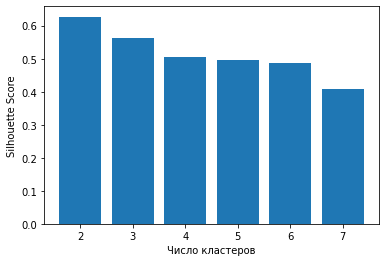

In [ ]:
silhouette_scores = [] 
for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(data, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(data))) 

k = [2, 3, 4, 5, 6, 7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Число кластеров', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [ ]:
cluster_count = 2

In [ ]:
rep_count = 19
alpha = 0.2

In [ ]:
hc = HeirarchicalClustering(cluster_count, rep_count, alpha)
hc.fit(data)
predictions = hc.predict(data)

In [ ]:
len(list(predictions)[1])

80

In [ ]:
len(list(predictions)[0])

73

In [ ]:
# Масисив числовой
colors_index = []
for i in range(len(data)):
  if (i in list(predictions)[1]):
    colors_index.append(1)
  elif (i in list(predictions)[0]):
    colors_index.append(0)
# Масисив цветов
colors = []
for i in colors_index:
  if (i==1):
      colors.append("#e98155")
  elif (i==0):
      colors.append("#9ee771")
  elif (i==2):
    colors.append("#f00")
  else:
    colors.append("#000")

In [ ]:
mydata = [dict(type='choropleth',
             locations = 
countries['Country'],
             locationmode = 'country names',
             z = colors_index,
             text = countries['Country'],
             colorscale = [(0,"#9ee771"), (1,"#e98155")],
             colorbar = {'title':'Кластеры'})]
layout = dict(title='Групировка стран по кластерам',
              geo=dict(showframe = False, projection = {'type':'mollweide'})) #type = ['equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 'albers usa', 'winkel tripel', 'aitoff', 'sinusoidal']
map4 = dict(data=mydata, layout=layout)
iplot(map4)

После пандемии в 2020 году около 10 стран (для 2019 и 2020 года наборы стран различны) аострадали от снижения уровня счастья населения.

В их число например вошли:  Россия, страны СНГ на ближнем востоке, Боливия, Венесуэлла, Парагвай, Индонезия и некоторые страны африки.

# Вывод
Полученные в ходе исследования данные говорят об отрицательной динамике показателей счастья в 2020 году. Наиболее стабильный кластер "счастливых стран" включает страны Северной америки, Австралия, Япония и Китай, страны ЕС, Бразилия и некоторые другие страны Южной Америки, Саудовская аравия, Турция.
Стабильно "несчастными' являются большинство стран Африки и ближнего востока, Индия.
В качестве колеблющихся стран выделяются: Россия, страны СНГ на ближнем востоке, Боливия, Венесуэлла, Парагвай, Индонезия, Либия и Алгеря.

Из этого следует, что первые две группы наиболее оптимальны для запуска соответствующих бизнесов компании. Страны выделенные в третьей группе нестабильны, по  выбранному аналитиками критерию. В связи с этим, рассматривать их в ближайшие пару лет компании не стоит. 